# Diabetes (clustering)
## 다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화하여라.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

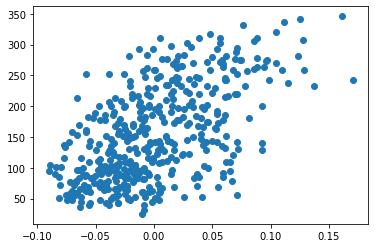

In [5]:
X_p = diabetes.data[:,2] #혈압
X_d = diabetes.target #당뇨 진행 정도
X = [X_p,X_d]
plt.scatter(X[0],X[1])

 ## 1. sklearn을 이용하지 않고

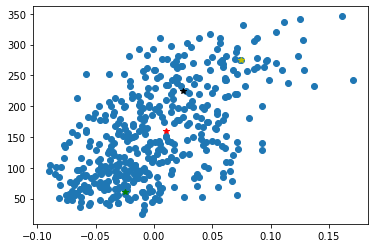

In [6]:
# 4개의 군집을 만들기 위해 4개의 중심점을 임의로 선택
plt.scatter(X[0],X[1])
plt.plot([-0.025],[60],'g*')
plt.plot([0.01],[160],'r*')
plt.plot([0.025],[225],'k*')
plt.plot([0.075],[275],'y*')

In [7]:
temp = []
for (i,j) in zip(X[0],X[1]):
    r1=(i+0.025)**2 + (j-60)**2
    r2=(i-0.01)**2 + (j-160)**2
    r3=(i-0.25)**2 + (j-225)**2
    r4=(i-0.75)**2 + (j-275)**2
    m = min(r1,r2,r3,r4)  
    temp.append([r1,r2,r3,r4].index(m))

In [8]:
x1 = np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2 = np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3 = np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
x4 = np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
r1 = np.mean(x1[0]),np.mean(x1[1])
r2 = np.mean(x2[0]),np.mean(x2[1])
r3 = np.mean(x3[0]),np.mean(x3[1])
r4 = np.mean(x4[0]),np.mean(x4[1])

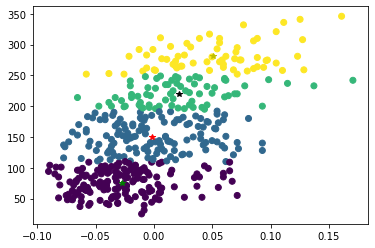

In [9]:
plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'g*')
plt.plot(r2[0],r2[1],'r*')
plt.plot(r3[0],r3[1],'k*')
plt.plot(r4[0],r4[1],'y*')

## 2. sklearn을 이용해서

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters = 4)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=4)

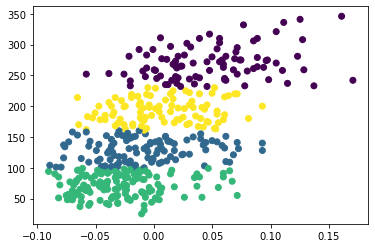

In [12]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

## 3. cluster 수를 결정하는 방법을 고안하여 적용해보아라

In [13]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_  #군집 내에서의 데이터간 거리의 평균

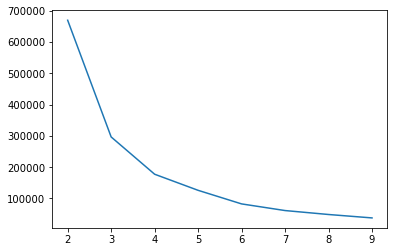

In [14]:
plt.plot(list(kiner.keys()), list(kiner.values()))